# Lecture 18
In this example, we will use multiple methods for **univariate time series forecasting**.

In [1]:
# Load libraries
from random import random
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy

In [2]:
def make_predictions(data, n_test, p, d, q, P=0, D=0, Q=0, s=0):
    data_list = data.values.tolist()
    train, test = data_list[0:(len(data)-n_test)], data_list[(len(data)-n_test):len(data)]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(train, order = (p, d, q), seasonal_order = (P, D, Q, s))
        fitted_model = model.fit()
        predicted = fitted_model.forecast()
        predictions.append(predicted[-1])
        train.append(test[t])
    # Evaluate predictions
    error = mean_squared_error(test, predictions)
    corr = numpy.corrcoef(test, predictions)[1, 0]
    print('MSE: %.3f' % error)
    print('Correlation: %.3f' % corr)
    # Plot results
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [6]:
# Load dataset
data = pd.read_csv('data_lecture_18_b.csv')
data = data.squeeze() # Convert to Series
data.head()

0    330.62
1    331.40
2    331.87
3    333.18
4    333.92
Name: CO2, dtype: float64

### Explore Time Series

<AxesSubplot:>

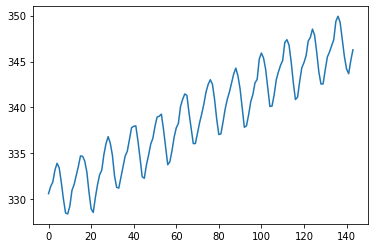

In [7]:
# Plot time series
data.plot()

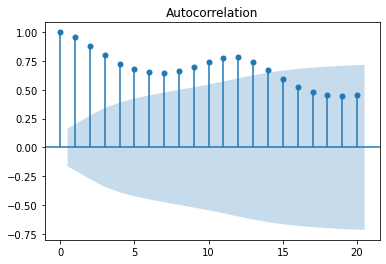

In [8]:
# Plot autocorrelation function
plot_acf(data, lags=20)
pyplot.show()

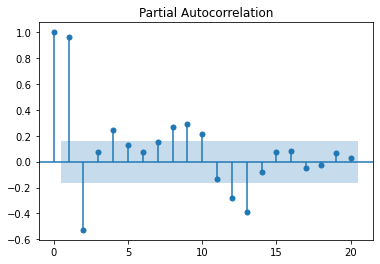

In [9]:
# Plot partial autocorrelation function
plot_pacf(data, lags=20)
pyplot.show()

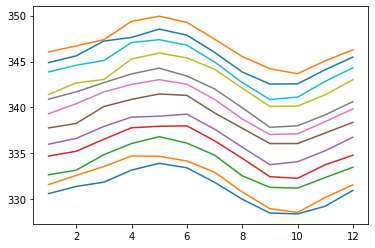

In [10]:
# Plot seasonal data
t = range(1,13)
for i in range(0,12):
    pyplot.plot(t, data[(i*12):((i+1)*12)])
pyplot.show()

### Method: Moving Average (MA)
Model for univariate time series without trend and seasonal components

In [ ]:
# Fit model
q = 1 # Parameter of MA model
model = ARIMA(data, order = (0, 0, q))
fitted_model = model.fit()
print(fitted_model.summary())

In [ ]:
# Make predictions
n_test = 24 # Number of observations for test
q = 1 # Parameter of MA model
make_predictions(data, n_test, 0, 0, q)

### Method: Autoregression (AR)
Model for univariate time series without trend and seasonal components

In [ ]:
# Fit model
p = 1 # Parameter of AR model
model = ARIMA(data, order = (p, 0, 0))
fitted_model = model.fit()
print(fitted_model.summary())

In [ ]:
# Make predictions
n_test = 24 # Number of observations for test
p = 1 # Parameter of AR model
make_predictions(data, n_test, p, 0, 0)

### Method: Autoregressive Moving Average (ARMA)
Model for univariate time series without trend and seasonal components

In [ ]:
# Fit model
p, q = 1, 1 # Parameters of ARMA model
model = ARIMA(data, order = (p, 0, q))
fitted_model = model.fit()
print(fitted_model.summary())

In [ ]:
# Make predictions
n_test = 24 # Number of observations for test
p, q = 1, 1 # Parameters of ARMA model
make_predictions(data, n_test, p, 0, q)

### Method: Autoregressive Integrated Moving Average (ARIMA)
Model for univariate time series with trend and without seasonal components

In [ ]:
# Fit model
p, d, q = 1, 1, 1 # Parameters of ARIMA model
model = ARIMA(data, order = (p, d, q))
fitted_model = model.fit()
print(fitted_model.summary())

In [ ]:
# Make predictions
n_test = 24 # Number of observations for test
p, d, q = 2, 1, 1 # Parameters of ARMA model
make_predictions(data, n_test, p, d, q)

### Method: Seasonal Autoregressive Integrated Moving Average (SARIMA)
Model for univariate time series with trend and/or seasonal components

In [ ]:
# Fit model
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12 # Parameters of SARIMA model
model = ARIMA(data, order = (p, d, q), seasonal_order = (P, D, Q, s))
fitted_model = model.fit()
print(fitted_model.summary())

In [ ]:
# Make predictions
n_test = 24 # Number of observations for test
p, d, q, P, D, Q, s = 1, 1, 1, 1, 1, 1, 12 # Parameters of SARIMA model
make_predictions(data, n_test, p, d, q, P, D, Q, s)